In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,Conv2D,Dense,Dropout,Flatten
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import random

In [6]:
train_data_dir = "C:\\Users\\kulka\\Downloads\\DL\\DL\\cifer-10-img\\train"
test_data_dir = "C:\\Users\\kulka\\Downloads\\DL\\DL\\cifer-10-img\\test"

train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_batch_size = 20000
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(32,32),
    batch_size = train_batch_size,
    class_mode = 'sparse',
    shuffle = True
)

test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(32,32),
    batch_size = test_batch_size,
    class_mode = 'sparse',
    shuffle = True
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [7]:
xtrain,ytrain = train_generator[0]
xtest,ytest = test_generator[0]

In [8]:
ytrain = ytrain.flatten()
ytest = ytest.flatten()

In [11]:
K = len(set(ytrain))
print("Number of classes:",K)

i = Input(shape=xtrain[0].shape)
x = Conv2D(32, (3,3), activation = "relu", padding = "same")(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation = "relu", padding = "same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation = "relu", padding = "same")(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation = "relu", padding = "same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation = "relu", padding = "same")(i)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation = "relu", padding = "same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

#Hidden Layer
x = Dense(1024, activation = "relu")(x)
x = Dropout(0.2)(x)

#Output layer
x = Dense(10, activation = "softmax")(x)

model = Model(i,x)

Number of classes: 10


In [12]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [13]:
history = model.fit(xtrain,ytrain,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
625/625 [==============================] - 208s 332ms/step - loss: 1.7239 - accuracy: 0.4227 - val_loss: 1.3311 - val_accuracy: 0.5240
Epoch 2/10
625/625 [==============================] - 201s 322ms/step - loss: 1.1985 - accuracy: 0.5760 - val_loss: 1.5164 - val_accuracy: 0.4800
Epoch 3/10
625/625 [==============================] - 209s 335ms/step - loss: 0.9263 - accuracy: 0.6740 - val_loss: 1.2079 - val_accuracy: 0.5780
Epoch 4/10
625/625 [==============================] - 206s 330ms/step - loss: 0.6874 - accuracy: 0.7569 - val_loss: 1.1413 - val_accuracy: 0.5860
Epoch 5/10
625/625 [==============================] - 213s 340ms/step - loss: 0.4754 - accuracy: 0.8370 - val_loss: 1.1487 - val_accuracy: 0.6230
Epoch 6/10
625/625 [==============================] - 221s 353ms/step - loss: 0.3021 - accuracy: 0.8993 - val_loss: 1.1672 - val_accuracy: 0.6330
Epoch 7/10
625/625 [==============================] - 229s 367ms/step - loss: 0.1915 - accuracy: 0.9396 - val_loss: 1.2292 -

In [14]:
test_loss, test_acc = model.evaluate(xtest,ytest)
print(f"Loss: {test_loss * 100:.1f}%")
print(f"Accuracy: {test_acc * 100:.1f}%")

32/32 [==============================] - 2s 53ms/step - loss: 1.3314 - accuracy: 0.6480
Loss: 133.1%
Accuracy: 64.8%


In [15]:
y = to_categorical(ytest)
predicted_value = model.predict(xtest)

32/32 [==============================] - 2s 53ms/step


In [16]:
labels = list(test_generator.class_indices.keys())

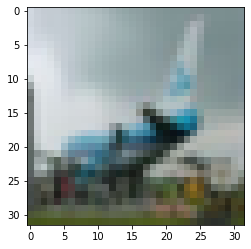

Actual: airplane
Predicted: airplane


In [17]:
n = random.randint(0,999)
plt.imshow(xtest[n])
plt.show()
print("Actual:",labels[np.argmax(ytest[n])])
print("Predicted:",labels[np.argmax(predicted_value[n])])

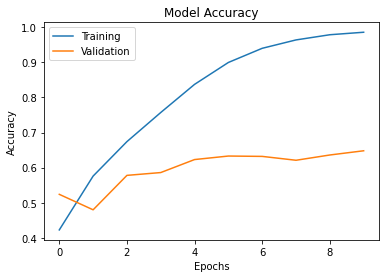

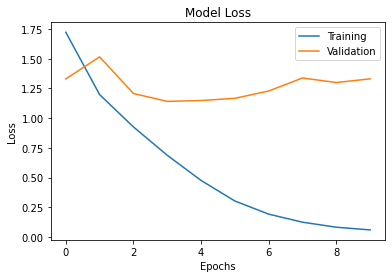

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend(['Training','Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend(['Training','Validation'])
plt.show()